**Az első 5 feladat ismétlés (többtáblás lekérdezések) a tanulmányi adatbázisból**

1. Készítsünk listát arról, hogy melyik óra melyik teremben van!
    
    1. Jelenítsük meg az óra azonosítóját és a terem nevét!
    2. A listát szűrjük a 3 karakter hosszú, \[100;199\] zárt intervallumba eső termekre! Feltesszük, hogy a 3 karakter hosszú terem nevek csak számjegyeket tartalmaznak.

In [ ]:
SELECT ora_id, terem
FROM Orak

2. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen az egyes napokon?</span>

1. Jelenítsük meg a napok nevét és az órák számát az adott napon!
2. Az oszlopokat nevezzük el értelemszerűen!
3. A listát rendezzük óraszám szerint növekvő sorrendbe!

In [3]:
SELECT n.nap AS Nap, Count(o.ora_id) AS Óra
FROM Orak o JOIN Napok n ON o.nap = n.nap_id
GROUP BY n.nap 
ORDER BY Óra

(5 rows affected)

Total execution time: 00:00:00.010

Nap,Óra
Péntek,6
Szerda,6
Kedd,13
Csütörtök,19
Hétfő,23


3. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik oktatónak hány órája van az Órák táblában!</span>

1. A lista jelenítse meg az oktatók nevét, és az órák számát!
2. Az oszlopokat nevezzük el értelemszerűen!
3. A listából hagyjuk ki az óraadókat!

In [6]:
SELECT okt.nev, COUNT(o.ora_id)
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar
GROUP BY okt.nev


(20 rows affected)

Total execution time: 00:00:00.011

nev,(No column name)
Aranyi Mária,1
Balkán András,3
Farkasos Piroska,7
Jogrerős Pál,2
Juhász András,2
Kiss János,4
Kovács András,4
Kovács László,4
Ludas Mátyás,2
Nógrádi Kata,1


4. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Van-e olyan tantárgy, amelyből nincs óra?</span>

1. Jelentsük meg a tantárgy nevét és a tantárgyfelelős nevét!

In [12]:
SELECT t.Tantárgynév, okt.nev
FROM Tantárgyak t LEFT JOIN Orak o ON t.Tkód = o.targy
                        JOIN Oktatok okt ON t.Tantárgyfelelős = okt.oktato_id
WHERE o.targy IS NULL 


(1 row affected)

Total execution time: 00:00:00.012

Tantárgynév,nev,Tantargykod,Tkód
Folyami gáttan,Varga Kata,NULL,11


5. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen a 120-as teremben?</span>

**A 6-10 feladatokat halmazműveletek segítségével oldjuk meg, szintén a tanulmányi adatbázison**

6. <span style="background-color:rgb(255, 255, 255);color:rgb(36, 41, 47);font-family:-apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;;font-size:16px;font-weight:600;">Jelenítsük meg azon tanárok azonosítóját és nevét, akik hétfői vagy keddi napokon tanítanak!</span>

In [15]:
SELECT okt.oktato_id, okt.nev
FROM Orak o JOIN Oktatok okt ON o.tanar = okt.oktato_id
            JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = 'hétfő'

UNION

SELECT okt.oktato_id, okt.nev
FROM Orak o JOIN Oktatok okt ON okt.oktato_id = o.tanar
            JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = 'kedd'

(17 rows affected)

Total execution time: 00:00:00.014

oktato_id,nev
1,Kovács László
2,Szentágotai Istvás
3,Szerb László
4,Ujfalussi István
5,Balkán András
6,Szép llonka
7,Kiss János
8,Pelikán József
9,Farkasos Piroska
10,Jogrerős Pál


7. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyek azok a tantárgyak, amelyek esetén van óra a 8.00-kor kezdődő sávban, de nincs a 12.30-kor kezdődő sávban?</span>

8. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Listázzuk azokat a termeket, amelyekben oktat Kovács László és van olyan tanóra a teremben, ahol a tantárgy nevében nem szerepel az 'ürge' szó!</span>

9. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik tanárnak hány órája van a (munka) hét elején (hétfőn), hét közben (kedd, szerda és csütörtök), illetve a hét végén (péntek)!</span>

1. Jelenítsük meg a tanár azonosítóját, nevét, az időszakot (hét eleje - hét közben - hét vége), valamint az óraszámot!
2. A három megjelölt időszakot külön kérdezzük le, majd fűzzük össze a lekérdezések eredményeit!
3. Rendezzük a listát az oktató neve, azon belül időszak szerint!

10. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyik napokon nincs órája Pelikán Józsefnek?</span>

In [21]:
SELECT nap
FROM Napok

EXCEPT 

SELECT n.nap
FROM Orak o JOIN Napok n ON o.nap = n.nap_id
            JOIN Oktatok okt ON o.tanar = okt.oktato_id
WHERE okt.nev ='Pelikán József'

(3 rows affected)

Total execution time: 00:00:00.015

nap
Csütörtök
Péntek
Szerda


**A 11-15 feladatok gyakorlásra szolgálnak a közelgő zh-ra :-)**

11. _Készítsünk listát az oktatók adatairól!_

1. Az oktatók titulusa és neve összefűzve jelenjen meg, közöttük szóközzel!
2. Ha valakinek nincs titulusa, akkor csak a neve jelenjen meg, szóköz nélkül!
3. A listát rendezzük a beosztás kódja, azon belül a státusz kódja szerint növekvő sorrendbe!
4. Az oszlopokat nevezzük el értelemszerűen!

In [38]:
SELECT oktato_id, beosztás, [status],
    CASE 
        WHEN titulus IS NULL THEN nev
        ELSE titulus + ' ' + nev
        END AS 'titulus és név'
FROM Oktatok
ORDER BY beosztás, [status]

(25 rows affected)

Total execution time: 00:00:00.012

oktato_id,beosztás,status,titulus és név
18,1,1,Nógrádi Kata
19,1,1,Rácz András
20,1,1,Kovács András
104,1,1,Ludas Mátyás
200,1,1,Aranyi Mária
300,1,1,Szabó Andrera
105,1,2,Kiss István
107,1,2,Mészáros Kriszta
108,2,1,Róbert Gida
111,2,1,Vitéz János


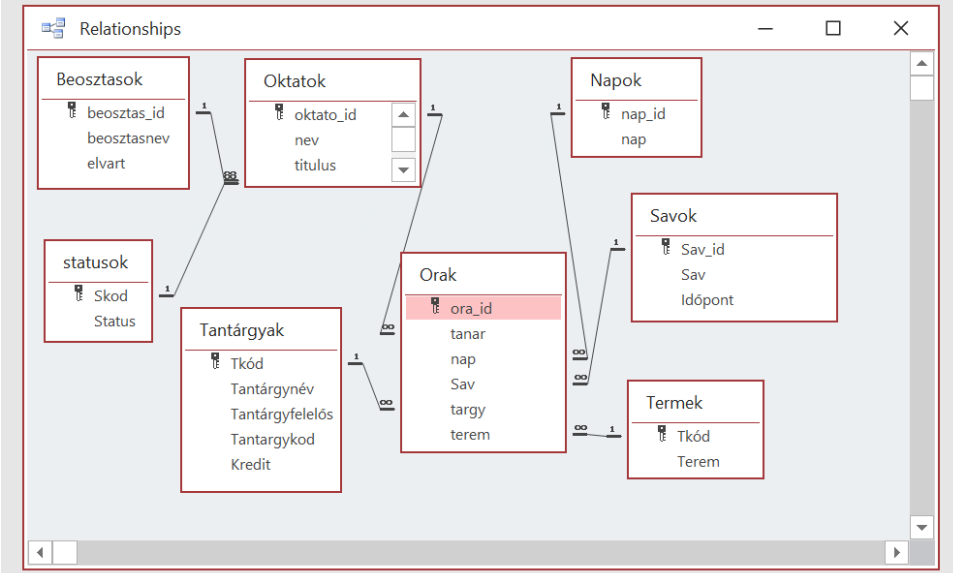

<span style="color: #09885a;">12</span>. Készítsünk listát, amely megmutatja, hogy összesen hány tantárgy van kreditenkénti csoportosításban!

  

A listából hagyjuk ki azokat a tételeket, ahol ez a darabszám <span style="color: #09885a;">1</span>!

A Folyami gáttan tantárgyat ne vegyük figyelembe!

A listát rendezzük darabszám szerint csökkenő sorrendbe!

Az oszlopokat nevezzük el értelemszerűen!

In [29]:
SELECT t.Kredit, COUNT(t.Tkód) AS Darab
FROM Tantárgyak t
WHERE t.Tantárgynév <> 'Folyami gáttan'
GROUP BY t.Kredit
HAVING COUNT(t.Tkód) <> 1
ORDER BY COUNT(t.Tkód) DESC

(4 rows affected)

Total execution time: 00:00:00.009

Kredit,Darab
2,3
3,3
4,2
1,2


13. _Készítsünk listát az oktatók nevéről, a beosztásuk alapján elvárt és a tényleges óraszámukról!_

1. Az oszlopok neve legyen 'Oktató neve', 'Elvárt óraszám' és 'Tényleges óraszám'
2. Szűrjük a listát azokra az oktatókra, ahol az elvárt és a tényleges óraszám azonos

In [36]:
SELECT okt.nev AS 'Oktató neve', b.elvart AS 'Elvárt óraszám', COUNT(o.ora_id) AS 'Tényleges óraszám'
FROM Oktatok okt JOIN Beosztasok b ON okt.beosztás = b.beosztas_id
                 JOIN Orak o ON okt.oktato_id = o.tanar
GROUP BY okt.nev, b.elvart
HAVING COUNT(o.ora_id) = b.elvart



(4 rows affected)

Total execution time: 00:00:00.034

Oktató neve,Elvárt óraszám,Tényleges óraszám
Jogrerős Pál,2,2
Juhász András,2,2
Varga Kata,4,4
Pelikán József,6,6


14. _Készítsünk listát, amely megmutatja, hogy mely tantárgyból nincs óra egyáltalán!_

1. Csak a tantárgy neve jelenjen meg!

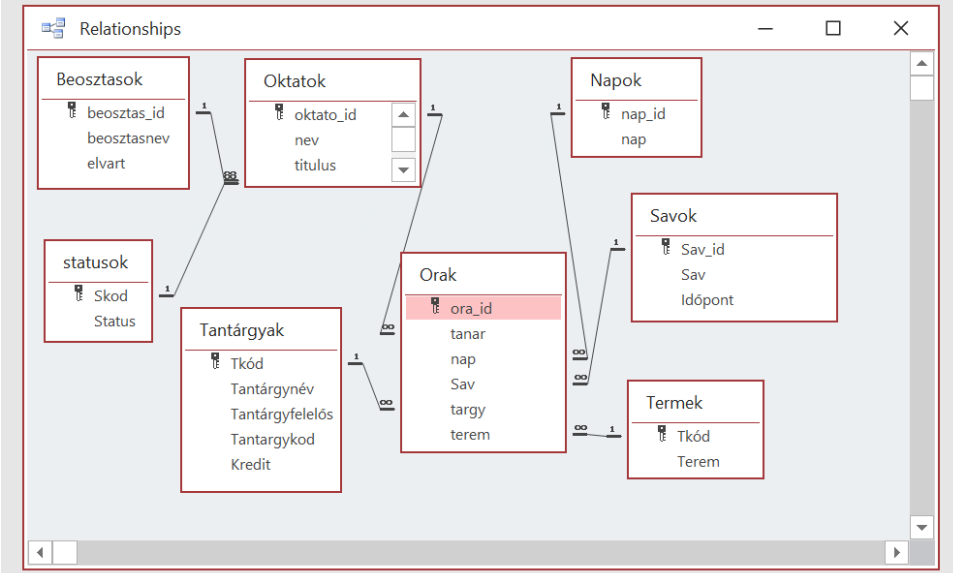

15. _Hány órájuk van az óraadóknak napi bontásban?_

1. Csak a napok nevét és az óraszámot jelenítsük meg!
2. Rendezzük a listát óraszám szerint növekvő sorrendbe!